# 9. データフレーム

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
from scipy import stats
%matplotlib inline
from itertools import cycle
import pyper

sns.set(style='ticks')
color_pal = plt.rcParams['axes.prop_cycle'].by_key()['color']
color_cycle = cycle(plt.rcParams['axes.prop_cycle'].by_key()['color'])

In [2]:
df = pd.read_csv('teaching_method.csv')
df

,ID,Name,Sex,Math,Statistics,Psychology_test,Statistics_test1,Statistics_test2,Method
0,1,大村,m,dislike,like,13,6,10,C
1,2,本多,m,dislike,like,14,10,13,B
2,3,川崎,m,like,like,7,6,8,B
3,4,多村,m,like,like,12,10,15,A
4,5,松中,m,dislike,dislike,10,5,8,B
5,6,小久保,m,dislike,dislike,6,3,6,C
6,7,柴原,m,dislike,dislike,8,5,9,A
7,8,井手,m,dislike,dislike,15,9,10,D
8,9,田上,m,dislike,dislike,4,3,7,D
9,10,松田,m,like,dislike,14,3,3,D


## 9.2 第２章の分析

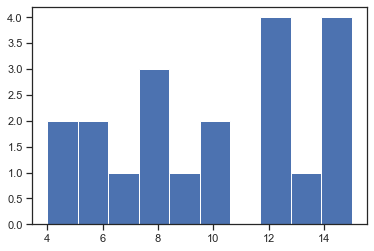

In [3]:
plt.hist(df['Psychology_test'])
plt.show()

In [4]:
df['Psychology_test'].mean()

10.0

In [5]:
df['Psychology_test'].var()

11.68421052631579

In [6]:
df['Psychology_test'].std()

3.418217448658846

In [7]:
# zscoreはscipy.stats.zscoreを用いる
# ddof=0(default)で標本分散、ddof=1で不偏分散を用いて計算
psy_zscore = stats.zscore(df['Psychology_test'], ddof=1)
psy_zscore

array([ 0.87765043,  1.17020057, -0.87765043,  0.58510028,  0.        ,
       -1.17020057, -0.58510028,  1.46275071, -1.75530085,  1.17020057,
       -0.29255014, -1.17020057,  0.        ,  0.58510028, -1.46275071,
        0.58510028, -0.58510028, -0.58510028,  0.58510028,  1.46275071])

In [8]:
deviation_value = 10*psy_zscore+50
deviation_value

array([58.77650426, 61.70200568, 41.22349574, 55.85100284, 50.        ,
       38.29799432, 44.14899716, 64.6275071 , 32.44699148, 61.70200568,
       47.07449858, 38.29799432, 50.        , 55.85100284, 35.3724929 ,
       55.85100284, 44.14899716, 44.14899716, 55.85100284, 64.6275071 ])

## 9.3 第３章の分析

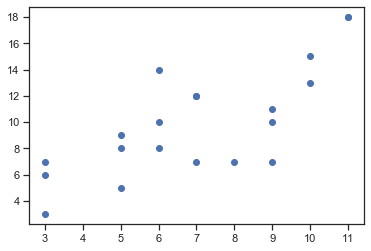

In [9]:
plt.scatter(df['Statistics_test1'], df['Statistics_test2'])
plt.show()

In [10]:
# pandas
df.cov()

,ID,Psychology_test,Statistics_test1,Statistics_test2
ID,35.000000,-0.421053,2.263158,-2.421053
Psychology_test,-0.421053,11.684211,3.368421,-1.315789
Statistics_test1,2.263158,3.368421,6.631579,7.947368
Statistics_test2,-2.421053,-1.315789,7.947368,16.947368


In [11]:
# numpy
np.cov(df['Statistics_test1'], df['Statistics_test2'])[0][1]

7.947368421052631

In [12]:
# pandas
df.corr()

,ID,Psychology_test,Statistics_test1,Statistics_test2
ID,1.000000,-0.020821,0.148550,-0.099407
Psychology_test,-0.020821,1.000000,0.382665,-0.093505
Statistics_test1,0.148550,0.382665,1.000000,0.749659
Statistics_test2,-0.099407,-0.093505,0.749659,1.000000


In [13]:
# numpy
np.corrcoef(df['Statistics_test1'], df['Statistics_test2'])[0][1]

0.7496589648242451

In [14]:
pd.crosstab(index=[df['Math']],columns=df['Statistics']) 

Statistics,dislike,like
Math,,
dislike,10,4
like,2,4


In [15]:
np.corrcoef( (df['Math']=='like').astype(np.int), (df['Statistics']=='like').astype(np.int) )[0][1]

0.35634832254989923

## 9.4 第5章の分析

In [16]:
# t検定
stats.ttest_ind(df['Psychology_test'], np.array([12]*20), equal_var=False)

Ttest_indResult(statistic=-2.616648017377738, pvalue=0.01697092026956344)

In [17]:
# 無相関検定
stats.pearsonr(df['Statistics_test1'], df['Statistics_test2'])

(0.749658964824245, 0.00014162288155448205)

In [18]:
# 独立性の検定
cross_df = pd.crosstab(index=[df['Math']],columns=df['Statistics']) 
x2, p, dof, e = stats.chi2_contingency(cross_df,correction=False)# correction=Falseは「イェーツの補正（イェーツの連続修正）」を適用しないということ
print(f'p値 　　　= {p :.3f}')
print(f'カイ2乗値 = {x2:.2f}')
print(f'自由度　  = {dof}')
print(f'期待度数: \n{e}')

p値 　　　= 0.111
カイ2乗値 = 2.54
自由度　  = 1
期待度数: 
[[8.4 5.6]
 [3.6 2.4]]


## 9.5 第6章の分析

In [19]:
# 独立な2群のt検定
stats.ttest_ind(df[df['Sex']=='m']['Statistics_test1'], df[df['Sex']=='f']['Statistics_test1'], equal_var=True)

Ttest_indResult(statistic=-1.8428853505018534, pvalue=0.08187801462410679)

In [20]:
# 対応のあるt検定
stats.ttest_rel(df['Statistics_test1'], df['Statistics_test2'])

Ttest_relResult(statistic=-4.8399026368560945, pvalue=0.00011378795008861286)

## 9.6 第７章の分析

In [21]:
# 分散の等質性の検定
from sklearn.preprocessing import LabelEncoder
#LabelEncoderのインスタンスを生成
le = LabelEncoder()
le.fit(df['Method'])

stats.bartlett(df['Statistics_test2'], le.transform(df['Method']))

BartlettResult(statistic=24.417074155815378, pvalue=7.757808289424357e-07)

In [22]:
r = pyper.R()
r('df <- read.csv("teaching_method.csv")')
print(r('df'))

try({df})
   ID   Name Sex    Math Statistics Psychology_test Statistics_test1
1   1   大村   m dislike       like              13                6
2   2   本多   m dislike       like              14               10
3   3   川崎   m    like       like               7                6
4   4   多村   m    like       like              12               10
5   5   松中   m dislike    dislike              10                5
6   6 小久保   m dislike    dislike               6                3
7   7   柴原   m dislike    dislike               8                5
8   8   井手   m dislike    dislike              15                9
9   9   田上   m dislike    dislike               4                3
10 10   松田   m    like    dislike              14                3
11 11   高谷   f    like       like               9               11
12 12   杉内   f dislike       like               6                6
13 13   和田   f    like       like              10               11
14 14   新垣   f dislike    dislike              12  

In [23]:
print(r('bartlett.test(df$Statistics_test2, df$Method)'))

try({bartlett.test(df$Statistics_test2, df$Method)})

	Bartlett test of homogeneity of variances

data:  df$Statistics_test2 and df$Method
Bartlett's K-squared = 0.70409, df = 3, p-value = 0.8722




In [24]:
# 一元分散分析（対応なし）
print(r('oneway.test(df$Statistics_test2~df$Method, var.equal=TRUE)'))

try({oneway.test(df$Statistics_test2~df$Method, var.equal=TRUE)})

	One-way analysis of means

data:  df$Statistics_test2 and df$Method
F = 7.1111, num df = 3, denom df = 16, p-value = 0.002988




In [25]:
# Tukeyの方法による多重比較
print(r('TukeyHSD(aov(df$Statistics_test2~df$Method))'))

try({TukeyHSD(aov(df$Statistics_test2~df$Method))})
  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = df$Statistics_test2 ~ df$Method)

$`df$Method`
    diff        lwr        upr     p adj
B-A -5.2 -10.514108  0.1141085 0.0562227
C-A -5.6 -10.914108 -0.2858915 0.0371222
D-A -8.4 -13.714108 -3.0858915 0.0017736
C-B -0.4  -5.714108  4.9141085 0.9963241
D-B -3.2  -8.514108  2.1141085 0.3446966
D-C -2.8  -8.114108  2.5141085 0.4561325




## 9.7 データフレームについて

In [29]:
hanshin = pd.DataFrame({'name':['Toritani', 'Akahoshi', 'Sheets', 'Kanemoto', 'Wiliams', 'Kubota', 'Hujikawa'],
                       'blood type':['B', 'A', 'A', 'O', np.nan,'AB', 'A'],
                       'height':[179,170,188,180,183,181,184],
                       'weight':[82,67,89,88,89,94,93],
                       'age':[26,31,36,39,35,26,27]})
hanshin

,name,blood type,height,weight,age
0,Toritani,B,179,82,26
1,Akahoshi,A,170,67,31
2,Sheets,A,188,89,36
3,Kanemoto,O,180,88,39
4,Wiliams,NaN,183,89,35
5,Kubota,AB,181,94,26
6,Hujikawa,A,184,93,27
